In [15]:
from solid import *
from solid.utils import *
import viewscad

import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

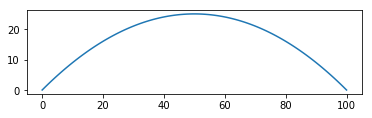

In [4]:
def w(l):
    return -(((l-50)**2)/100) + 25

x = np.linspace(0,100,100)
plt.plot(x, w(x))
plt.gca().set_aspect('equal', 'box')

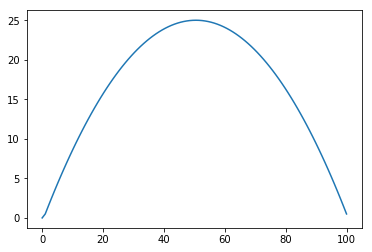

In [6]:
res=100

def meanW(l1,l2):
    heights = np.linspace(l1,l2)
    widths = w(heights)
    return np.mean(widths)

x = np.linspace(0,100,res)
wid = [w(x[0])]
i = 1
while i < np.size(x):
    j = meanW(x[i-1], x[i])
    wid.append(j)
    
    i += 1
    
plt.plot(x,wid);

In [7]:
c = cube([2,3,4])
r = viewscad.Renderer()
r.render(c)

In [ ]:
def resDemo(Layers=10):
    height = 100

    layerHeight = height / res

    x = np.linspace(0,height,res)
    wid = [w(x[0])]
    i = 1
    while i < np.size(x):
        j = meanW(x[i-1], x[i])
        wid.append(j)

        i += 1

    c = cube([0,0,0])

    for layer, width in zip(x,wid):
        c += up(layer)(cylinder(r=width, h=layerHeight, center=True))

    r = viewscad.Renderer()
    r.render(c)

In [ ]:
interact(resDemo, Layers=(1,100))